# Assignment 2

| Name          | Matriculation number     |
| ------------- | --------- |
| Peilin Yue    | 03719075  |
| Zhihao Yu     | 03751696  |
| Runcong Wang  | 03752851  |
| Yueyang Zhang | 03752974  |
| Cheng Qian    | 03715402  |
| Wei Hao       | 03773713  |

## Task1 

### part1:
$ SVD(X) = U\Sigma  V^T, X \in \mathbb{R} ^{p\times N},p<N $

$$ \Sigma = \begin{pmatrix}
    \sigma_{1,1} & 0 & \dots & 0 & 0 & \dots & 0 \\\\ 
    0 & \sigma_{2,2} &  & \vdots & 0 & \dots & 0 \\\\ 
    \vdots &  & \ddots &  & 0 & \dots & 0 \\\\ 
    0 & \dots &  & \sigma_{p,p} & 0 & \dots & 0
\end{pmatrix} \in \mathbb{R} ^{p\times N}, 
\Sigma \Sigma^T = \begin{pmatrix}
    \sigma_{1,1}^2 & 0 & \dots & 0  \\
    0 & \sigma_{2,2}^2 &  & \vdots  \\
    \vdots &  & \ddots &    \\
    0 & \dots &  & \sigma_{p,p}^2 \\
\end{pmatrix} \in \mathbb{R} ^{p\times p}
$$

$ s\in \mathbb{R} ^{p}, s = 
\begin{bmatrix}
 s_{1}\\
 s_{2}\\
 \vdots\\
s_{p}
\end{bmatrix} $

$$ s^T \Sigma \Sigma ^T s = \left [ s_{1} \space s_{2}\space ... \space s_{p}\right ]\cdot \begin{pmatrix}
    \sigma_{1,1}^2 & 0 & \dots & 0  \\
    0 & \sigma_{2,2}^2 &  & \vdots  \\
    \vdots &  & \ddots &    \\
    0 & \dots &  & \sigma_{p,p}^2 \\
\end{pmatrix} \cdot 
\begin{bmatrix}
 s_{1}\\
 s_{2}\\
 \vdots\\
s_{p}
\end{bmatrix}
$$

$$  \Rightarrow = s_{1}^{2} \sigma _{1,1}^{2} + s_{2}^{2} \sigma _{2,2}^{2} + ... +  s_{p}^{2} \sigma _{p,p}^{2}
= \sum_{i = 1}^{p}s_{i}^{2} \sigma _{i,i}^{2}
$$

$$ \widehat{s} =  arg max_{s,\left \| s \right \| = 1} (s^T \Sigma \Sigma ^T s) = arg max_{s,\left \| s \right \| = 1}(\sum_{i = 1}^{p}s_{i}^{2} \sigma _{i,i}^{2}) $$

since $ \sigma _{1,1} \ge \sigma _{2,2} \ge ... \ge \sigma _{p,p}$  and $ \left \| s \right \| = 1 \Rightarrow \sum_{i = 1}^{p}s_{i}^{2} = 1 $ 

so $ s_{1} = 1 $ or $ s_{1} = -1 $ , $ s_{2}$ to $ s_{p} = 0 $
$
\widehat{s} = 
\begin{bmatrix}
 1\\
 0\\
 \vdots\\
0
\end{bmatrix} $ 
or $ \widehat{s} = 
\begin{bmatrix}
 -1\\
 0\\
 \vdots\\
0
\end{bmatrix} $, $ \widehat{s} \in \mathbb{R} ^{p} $

### part2:
$ U = \left [ u_{1} \space u_{2}\space ... \space u_{p}\right ] $ assume a = Uz, where $ z \in \mathbb{R} ^{p}. \space z = \left [ z_{1} \space z_{2}\space ... \space z_{p}\right ]^{T} $

$ \left \| a \right \| = 1 \Rightarrow \left \| Uz \right \| = 1 $  , Because U is an unitary matrix, so $ \left \| Uz \right \| = \left \| z \right \| = 1 $

$$ \frac{1}{N} \sum_{i = 1}^{N} (a^{T} x_{i})^2 = \frac{1}{N}a^{T}XX^Ta = \frac{1}{N}(Uz)^TU\Sigma V^TV\Sigma^TU^T(Uz) $$
$$ \Rightarrow  = \frac{1}{N}z^TU^TU\Sigma^2U^TUz = \frac{1}{N}z^T\Sigma^2z $$

same as in part1, $$ \Rightarrow  = \frac{1}{N}(z_{1}^{2} \sigma _{1,1}^{2} + z_{2}^{2} \sigma _{2,2}^{2} + ... +  z_{p}^{2} \sigma _{p,p}^{2}) $$
$$ = \frac{1}{N} \sum_{i = 1}^{p}z_{i}^{2} \sigma _{i,i}^{2} $$

$$ arg max_{z,\left \| z \right \| = 1} (\frac{1}{N} \sum_{i = 1}^{p}z_{i}^{2} \sigma _{i,i}^{2}) $$

similar to part1, $ z = 
\begin{bmatrix}
 1\\
 0\\
 \vdots\\
0
\end{bmatrix} $ or $ z = 
\begin{bmatrix}
 -1\\
 0\\
 \vdots\\
0
\end{bmatrix} $

when $ z = 
\begin{bmatrix}
 1\\
 0\\
 \vdots\\
0
\end{bmatrix} $, $ Uz = \left [ u_{1} \space u_{2}\space ... \space u_{p}\right ] \cdot 
\begin{bmatrix}
 1\\
 0\\
 \vdots\\
0
\end{bmatrix} = u_{1} $

$u_{1}$ is the first column of U. so, it is proved that $ \frac{1}{N} \sum_{i = 1}^{N} (a^{T} x_{i})^2 = \frac{1}{N}a^{T}XX^Ta  $ is maximaized when a is set to the frist column of U.

## Task 2

In [1]:
from PIL import Image
import re
import numpy as np
from matplotlib import pyplot as plt
import os

def load_and_preprocess_images(directory, image_size=(50, 50)):
    image_vectors = []
    labels = []

    # Iterate through each file in the directory
    for filename in os.listdir(directory):
        if filename.endswith(".png"):
            # Read image
            filepath = os.path.join(directory, filename)
            with Image.open(filepath) as img:
                # Convert to grayscale
                img_gray = img.convert('L')
                # Resize image
                img_resized = img_gray.resize(image_size)
                # Convert to numpy array and flatten
                img_vector = np.array(img_resized).flatten()
                image_vectors.append(img_vector)

                # Extract label from filename (format 'personXX_YY.png')
                label = int(filename.split('_')[0].replace('person', ''))
                labels.append(label)

    return np.array(image_vectors), np.array(labels)

# Paths to the directories
base_path = './task2_data/yaleBfaces/'  
subsets = ['subset0', 'subset1', 'subset2', 'subset3', 'subset4']

# Load and preprocess images from each subset
data = []
labels = []
for subset in subsets:
    directory = os.path.join(base_path, subset)
    subset_data, subset_labels = load_and_preprocess_images(directory)
    data.append(subset_data)
    labels.append(subset_labels)

# data[0] contains images from subset0, its label is stored in labels[0]
# data[1] contains images from subset1, its label is stored in labels[1]
# data[2] contains images from subset2, its label is stored in labels[2]
# data[3] contains images from subset3, its label is stored in labels[3]
# data[4] contains images from subset4, its label is stored in labels[4]



**In the task statement, the 20 first singular vectors of U is taken, that is because in the context of the task statement, each column of T is considered as an image or a sample(in this case, shape of T is (2500,70), U is (2500,70), Vt is (70,70)). Since it is more common that each row of the matrix is considered as a sample(in this case shape of T is (70,2500), U is (70,70), Vt is (70,2500)), we decide to use the latter form of T. Thus, we take 20 first singular vectors of V, instead of the singular vector U in the context of task statement. It is also convinent for solving the following tasks by using sklearn module.**

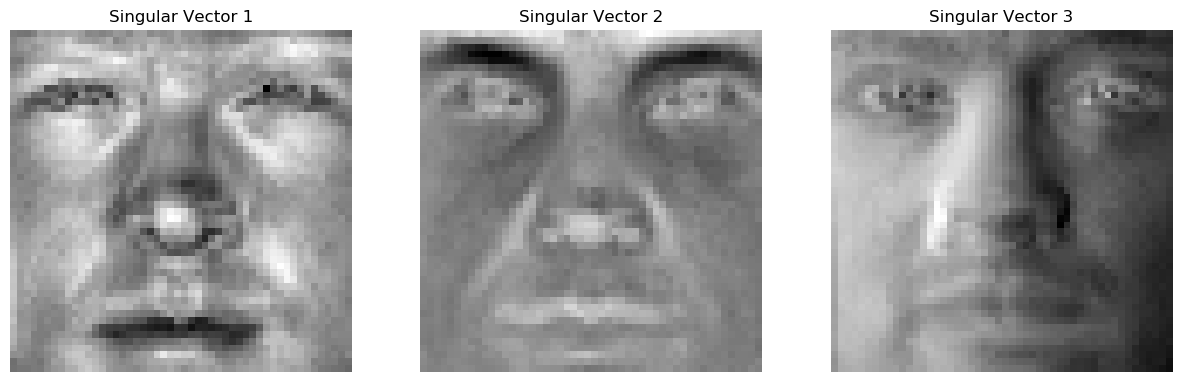

In [2]:
# Perform SVD


def center_data(T):
    """
    Center the data by subtracting the mean of each feature (pixel).
    
    Parameters:
    T (numpy.ndarray): The matrix containing vectorized images, 
                       where each row is an image.
    
    Returns:
    numpy.ndarray: The centered data.
    numpy.ndarray: The mean of each feature.
    """
    # Calculate the mean of each feature (pixel)
    mean_image = np.mean(T, axis=0)

    # Subtract the mean from each image
    T_centered = T - mean_image

    return T_centered, mean_image


def compute_and_display_singular_vectors(T):
    # Perform SVD
    U, S, Vt = np.linalg.svd(T, full_matrices=False)

    # Extract first 20 singular vectors
    V_20 = Vt[:20, :]

    # Display the first 3 vectors as 50x50 images
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    for i in range(3):
        axs[i].imshow(V_20[i, :].reshape(50, 50), cmap='gray')
        axs[i].set_title(f'Singular Vector {i+1}')
        axs[i].axis('off')
    plt.show()

    return V_20
T = data[0]   
T, mean_image = center_data(T)
V_20 = compute_and_display_singular_vectors(T)

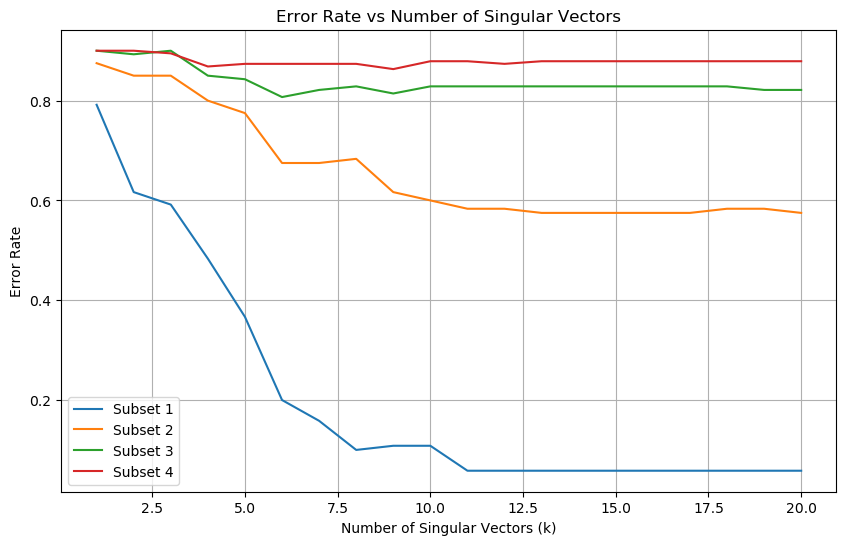

In [3]:
# KNN
from sklearn.neighbors import KNeighborsClassifier

def classify_and_plot_error_rate(T, labels_T, S, labels_S, V_20):
    """
    T: from data[0], which is the training set.
    labels_T: labels of the training set.
    S: from data[1:5], which is test set subset1,2,3,4
    labels_S : labels of the test set.
    V_20: fist 20 sigular vectors from SVD(T)
    """
    error_rates = np.zeros((4, 20))  # 4 test subsets and k from 1 to 20

    # Iterate through subsets 1-4 and k = 1-20
    for subset in range(4):  # S and labels_S are lists containing data for each subset
        for k in range(1, 21):
            # Project training and test data onto the first k singular vectors
            T_proj = np.dot(T, V_20[:k, :].T)
            S_proj = np.dot(S[subset], V_20[:k, :].T)

            # Classification using 3-NN
            classifier = KNeighborsClassifier(n_neighbors=3)
            classifier.fit(T_proj, labels_T)
            predictions = classifier.predict(S_proj)

            # Calculate error rate
            error_rate = np.mean(predictions != labels_S[subset])
            error_rates[subset, k - 1] = error_rate

    # Plot error rates
    plt.figure(figsize=(10, 6))
    for subset in range(4):
        plt.plot(range(1, 21), error_rates[subset], label=f'Subset {subset+1}')
    plt.xlabel('Number of Singular Vectors (k)')
    plt.ylabel('Error Rate')
    plt.title('Error Rate vs Number of Singular Vectors')
    plt.legend()
    plt.grid(True)
    plt.show()

    return error_rates

error_rates_including = classify_and_plot_error_rate(data[0], labels[0], data[1:5], labels[1:5], V_20)

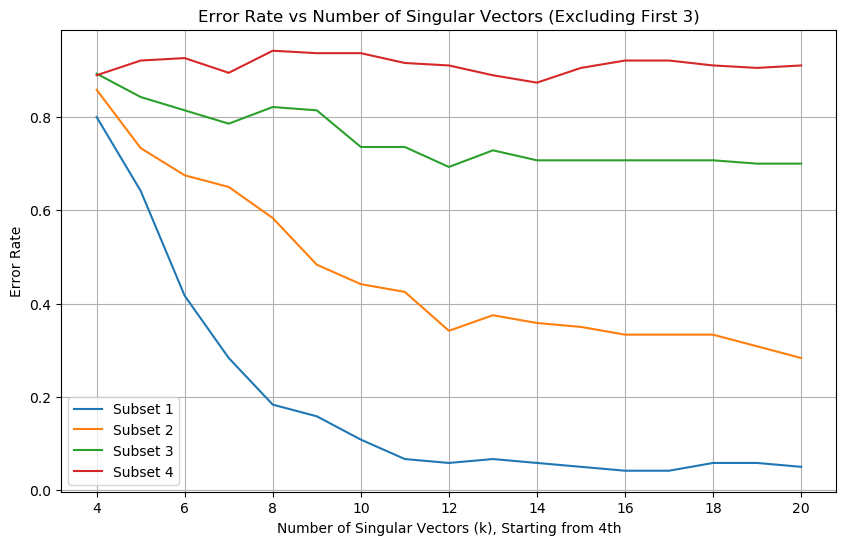

In [4]:
def classify_and_plot_error_rate_excluding_first_three(T, labels_T, S, labels_S, V_20):
    """
    T: from data[0], which is the training set.
    labels_T: labels of the training set.
    S: from data[1:5], which is test set subset1,2,3,4
    labels_S : labels of the test set.
    V_20: fist 20 sigular vectors from SVD(T)
    """
    error_rates = np.zeros((4, 17))  # 17 values of k since we exclude the first 3 vectors

    for subset in range(4):  
        for k in range(4, 21):  # Start from the 4th singular vector
            # Project training and test data
            T_proj = np.dot(T, V_20[3:k, :].T)
            S_proj = np.dot(S[subset], V_20[3:k, :].T)

            # Classification using 3-NN
            classifier = KNeighborsClassifier(n_neighbors=3)
            classifier.fit(T_proj, labels_T)
            predictions = classifier.predict(S_proj)

            # Calculate error rate
            error_rate= np.mean(predictions != labels_S[subset])
            error_rates[subset, k - 4] = error_rate
    # Plot error rates
    plt.figure(figsize=(10, 6))
    for subset in range(4):
        plt.plot(range(4, 21), error_rates[subset], label=f'Subset {subset+1}')
    plt.xlabel('Number of Singular Vectors (k), Starting from 4th')
    plt.ylabel('Error Rate')
    plt.title('Error Rate vs Number of Singular Vectors (Excluding First 3)')
    plt.legend()
    plt.grid(True)
    plt.show()

    return error_rates
    
error_rates_excluding = classify_and_plot_error_rate_excluding_first_three(data[0], labels[0], data[1:5], labels[1:5], V_20)

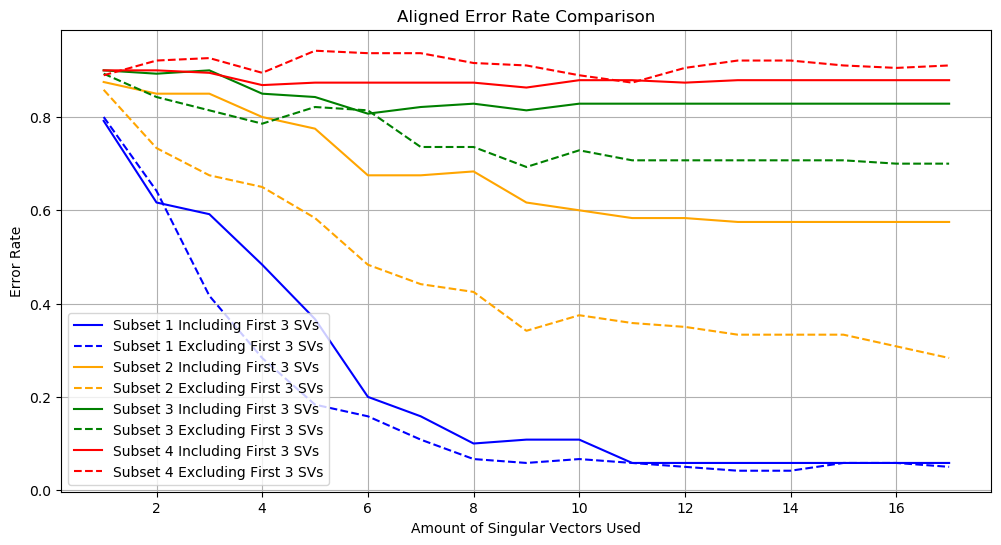

In [5]:
import matplotlib.pyplot as plt

def plot_error_rates_aligned(error_rates_including, error_rates_excluding):
    plt.figure(figsize=(12, 6))

    # Define a set of colors for the subsets
    colors = ['blue', 'orange', 'green', 'red']

    # Number of singular vectors used (1 to 17)
    num_singular_vectors = range(1, 18)

    # Plotting error rates (aligned based on the number of singular vectors used)
    for subset in range(4):
        # Including the first three singular vectors
        plt.plot(num_singular_vectors, error_rates_including[subset][:17], 
                 color=colors[subset], label=f'Subset {subset+1} Including First 3 SVs')

        # Excluding the first three singular vectors
        plt.plot(num_singular_vectors, error_rates_excluding[subset], 
                 color=colors[subset], linestyle='--', label=f'Subset {subset+1} Excluding First 3 SVs')

    plt.xlabel('Amount of Singular Vectors Used')
    plt.ylabel('Error Rate')
    plt.title('Aligned Error Rate Comparison')
    plt.legend()
    plt.grid(True)
    plt.show()


plot_error_rates_aligned(error_rates_including, error_rates_excluding)



If we see the trends of both scenarios,the performace of the experiment without the first three singular vectors(SVs) is better than the one include the first three SVs at most of the time. That is because the first three SVs contains dominant features of the data. The first three components might caputure variations that are not useful for the specific classification task. For instance, the dominant features might be related to lighting and shadows, if we include these features, it will lead to overfitting and thus its performance might be worse on the test set.